Data preview:
           date  price
9622 2025-04-22  68.93
9623 2025-04-23  68.26
9624 2025-04-24  67.50
9625 2025-04-25  66.99
9626 2025-04-28  66.13


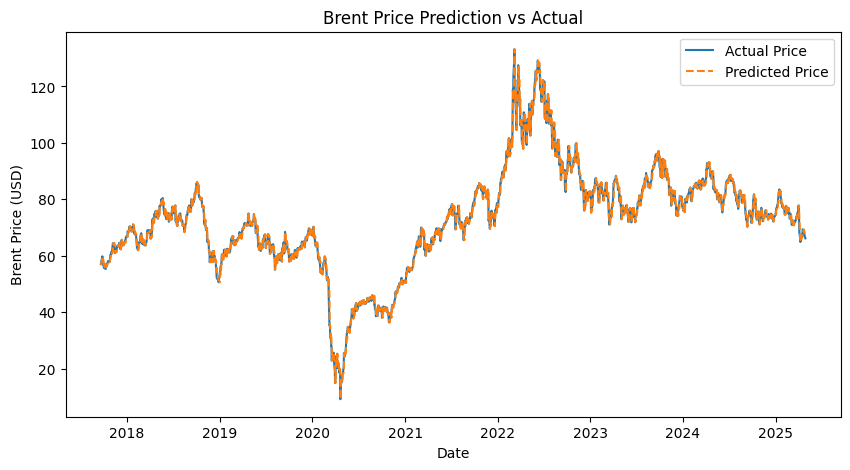

Mean Absolute Error: 1.228410921653836


In [4]:
# Blaine's Brent Price Predictor
# Week 2 project

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Step 1: Load data
url = "https://raw.githubusercontent.com/datasets/oil-prices/master/data/brent-daily.csv"
df = pd.read_csv(url)

# Rename 'Date' column for clarity and convert to datetime
df.rename(columns={'Date': 'date', 'Price': 'price'}, inplace=True)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

print("Data preview:")
print(df.tail())

# Step 2: Prepare data
# We'll use previous day's price to predict today's price (very simple model)

df['price_previous'] = df['price'].shift(1)
df = df.dropna()

X = df[['price_previous']].values
y = df['price'].values

# Step 3: Split into train/test sets
split_point = int(len(df) * 0.8)
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

# Step 4: Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Plot results
plt.figure(figsize=(10,5))
plt.plot(df['date'][split_point:], y_test, label='Actual Price')
plt.plot(df['date'][split_point:], y_pred, label='Predicted Price', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Brent Price (USD)')
plt.legend()
plt.title('Brent Price Prediction vs Actual')
plt.show()

# Step 7: Print model performance
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
